# Facial Landmarks

In [ ]:
image_path = '/content/drive/My Drive/sample_images/'
model_path = '/content/drive/My Drive/pickles/shape_predictor_68_face_landmarks.dat'

In [ ]:
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import imutils
import dlib
import cv2
import matplotlib.pylab as plt

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor and the face aligner
detector = dlib.get_frontal_face_detector()

predictor = dlib.shape_predictor(model_path)
face_aligner = FaceAligner(predictor, desiredFaceWidth=256) 
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(image_path+'scientists.png')
image = imutils.resize(image, width=800)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# show the original input image and detect faces in the grayscale image
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.title('Original Image: Famous Indian Scientists', size=20)
plt.show()
rects = detector(gray, 2)
print('Number of faces detected:', len(rects))
i = 1
# loop over the face detections
plt.figure(figsize=(10,20))
plt.subplots_adjust(0,0,1,1,0.05,0.12)
for rect in rects:
    # extract the ROI of the *original* face, then align the face
    # using facial landmarks
    (x, y, w, h) = rect_to_bb(rect)
    face_original = imutils.resize(image[y:y + h, x:x + w], width=256)
    face_aligned = face_aligner.align(image, gray, rect)

    # display the output images
    plt.subplot(9,4,i), plt.imshow(cv2.cvtColor(face_original, cv2.COLOR_BGR2RGB)), plt.title("Original", size=15), plt.axis('off')
    plt.subplot(9,4,i+1), plt.imshow(cv2.cvtColor(face_aligned, cv2.COLOR_BGR2RGB)), plt.title("Aligned", size=15), plt.axis('off')
    i += 2
plt.show()

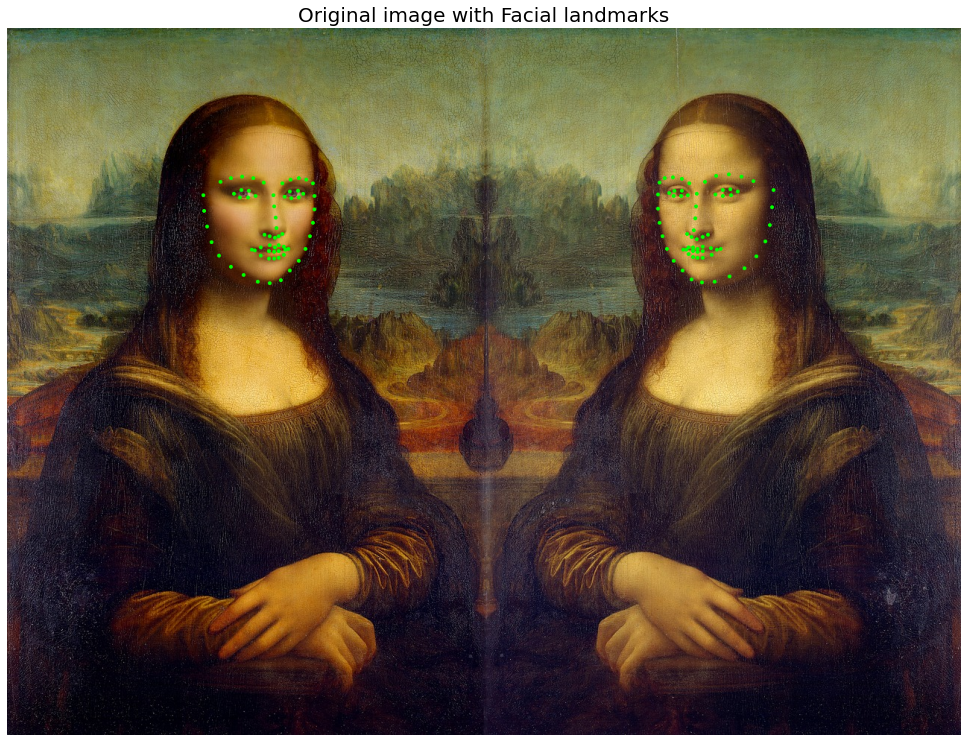

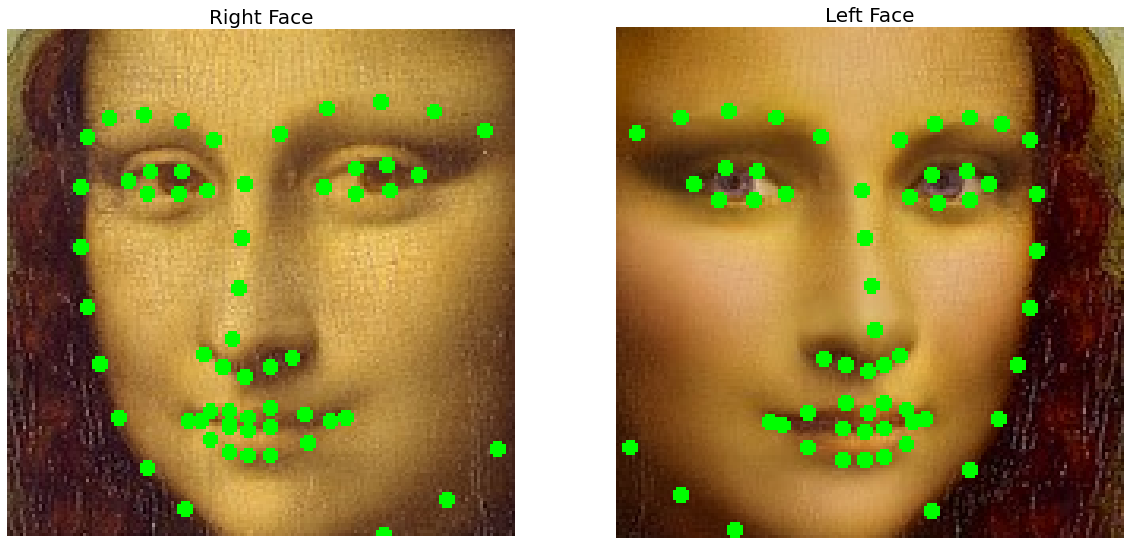

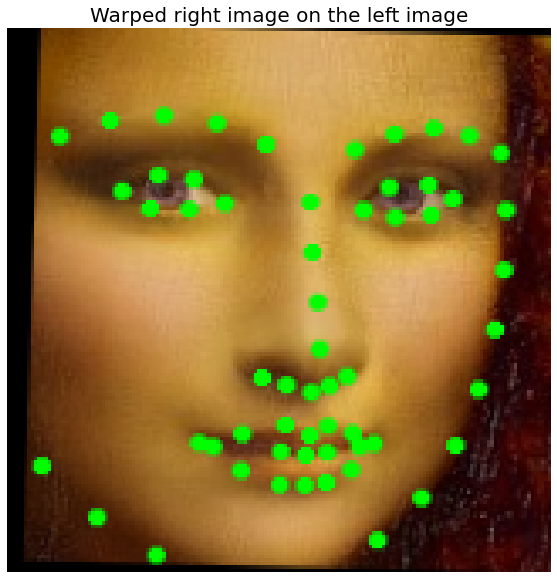

In [ ]:
import dlib
import cv2
from imutils import face_utils
from skimage.transform import AffineTransform, warp
import numpy as np
import matplotlib.pylab as plt

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor and the face aligner
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(model_path)
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(image_path+'monalisa.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 2)

faces = []
face_landmarks = []
for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (left, top, w, h) = face_utils.rect_to_bb(rect)
    faces.append(image[top:top+h, left:left+w])
    landmark = []
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 255, 0), 2)
        landmark.append([x-left,y-top])
    face_landmarks.append(np.array(landmark))
        
plt.figure(figsize=(20,13))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original image with Facial landmarks', size=20)
plt.show()
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Right Face', size=20)
plt.subplot(122), plt.imshow(cv2.cvtColor(faces[1], cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Left Face', size=20)
plt.show()

transform = AffineTransform()
transform.estimate(face_landmarks[0], face_landmarks[1])
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(warp(cv2.cvtColor(faces[1], cv2.COLOR_BGR2RGB), transform, output_shape=faces[0].shape)), plt.axis('off'), plt.title('Warped right image on the left image', size=20)
plt.show()